### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import h5py
import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import pickle
import datetime
from warnings import simplefilter
sys.path.append(
    os.path.abspath(
        os.path.join("__file__", '..', '..')
    )
)



simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from util.notebook_util import id_to_plot, plot_dist_rep, get_rep_num_time_series, get_portion_time_series
from model.central_authority import dataCollection, distRepNum, sampleCollection
from util.plot_util import plot_time_series_private_r0, plot_time_series_diff_private_original, save_fig, node2Info

### File Setting

In [2]:
# result directory
res_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'results')
)

# figure directory
fig_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'figures')
)

# epidemiology result file
epi_resfile = os.path.join(
    res_dir, 'epi_analysis.hdf5'
)

##############################
##### First clustering results
##############################
# basic information
complevel=7
complib='zlib'
key_base = Path("/first_clustering")
with pd.HDFStore(epi_resfile, complevel=complevel, complib=complib) as store:
    print(f"File {epi_resfile} has {len(store.keys())} entries.")

    ########################################################
    ##### Load clustering and the corresponding csse results
    ########################################################
    # cluster information
    key = str(key_base / 'basic' / "cluster")
    df_clusters_first = store[key]

    #############################
    ##### population related data
    #############################
    # infected portion
    key = str(key_base / "population" / "infected_portion")
    df_inf_portion_first = store[key]

# reproduction numbers
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..', 'results')))
save_file_name = 'rep_num_exptest.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))   

with open(save_str, 'rb') as f:
    rep_num_logger = pickle.load(f)
    dataCollection_1023 = rep_num_logger["effective_reproduction_number_matrix"]

###############################
##### Second clustering results
###############################
# basic information
complevel=7
complib='zlib'
key_base = Path("/second_clustering")
with pd.HDFStore(epi_resfile, complevel=complevel, complib=complib) as store:
    print(f"File {epi_resfile} has {len(store.keys())} entries.")

    ########################################################
    ##### Load clustering and the corresponding csse results
    ########################################################
    # cluster information
    key = str(key_base / 'basic' / "cluster")
    df_clusters_second = store[key]

    # confirmed cases information
    key = str(key_base / 'basic' / "confirmed_cases")
    df_confirmed_case_second = store[key]

    #############################
    ##### population related data
    #############################
    # infected portion
    key = str(key_base / "population" / "infected_portion")
    df_inf_portion_second = store[key]

File /home/python/shared/results/epi_analysis.hdf5 has 12 entries.
File /home/python/shared/results/epi_analysis.hdf5 has 12 entries.


### Plot

#### 1. Differential privacy results

Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_0.png
Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_0.svg
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_0.png
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_0.svg
Written file: /home/python/shared/figures/private_res/Delta_to_Detroit_0.png
Written file: /home/python/shared/figures/private_res/Delta_to_Detroit_0.svg
Written file: /home/python/shared/figures/private_res/Detroit_to_Delta_0.png
Written file: /home/python/shared/figures/private_res/Detroit_to_Delta_0.svg
Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_1.png
Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_1.svg
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_1.png
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_1.svg
Written file: /home/python/shared/figures/private_res/Delta_to_Detroit_1.png

/tmp/ipykernel_47697/90974569.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1 = plt.figure(figsize=(7,3))


Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_5.png
Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_5.svg
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_5.png
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_5.svg
Written file: /home/python/shared/figures/private_res/Delta_to_Detroit_5.png
Written file: /home/python/shared/figures/private_res/Delta_to_Detroit_5.svg
Written file: /home/python/shared/figures/private_res/Detroit_to_Delta_5.png
Written file: /home/python/shared/figures/private_res/Detroit_to_Delta_5.svg
Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_6.png
Written file: /home/python/shared/figures/private_res/Miami_to_Detroit_6.svg
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_6.png
Written file: /home/python/shared/figures/private_res/Detroit_to_Miami_6.svg
Written file: /home/python/shared/figures/private_res/Delta_to_Detroit_6.png

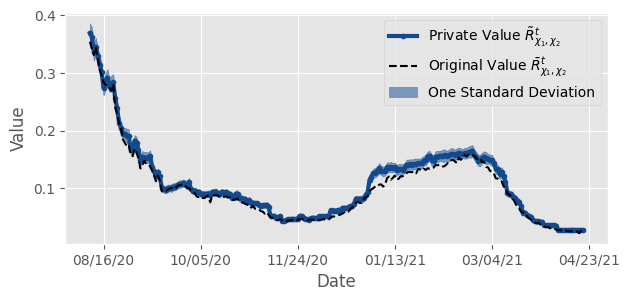

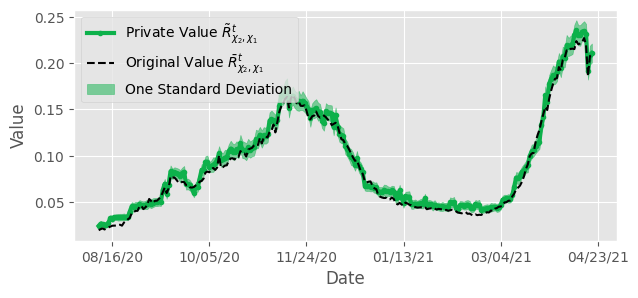

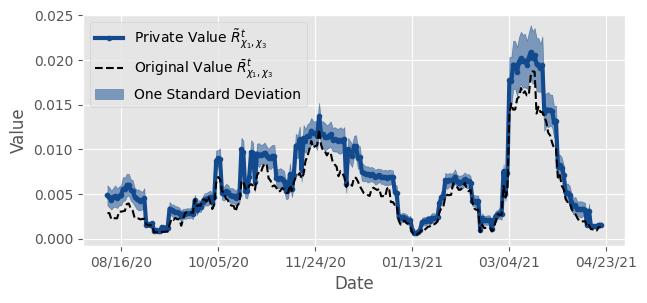

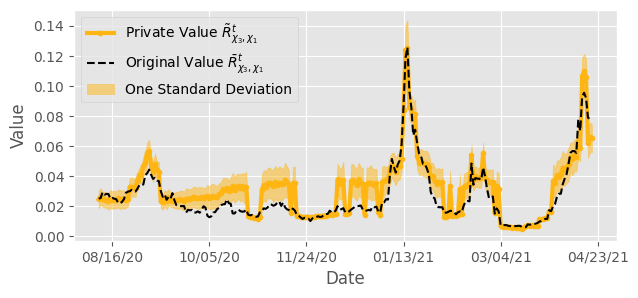

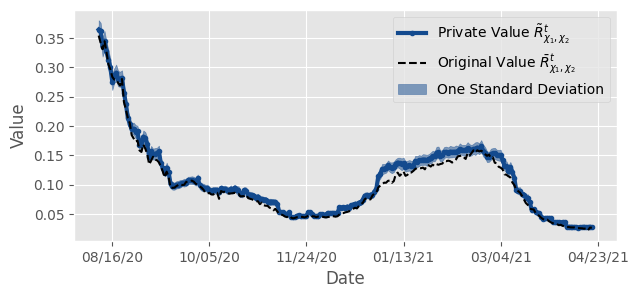

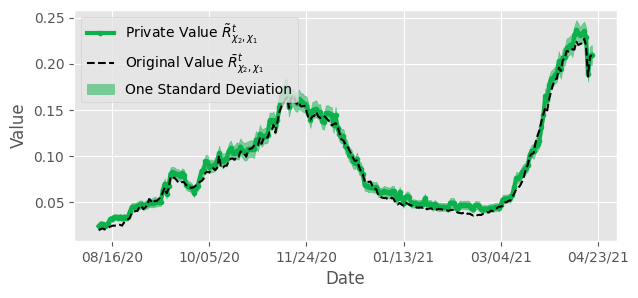

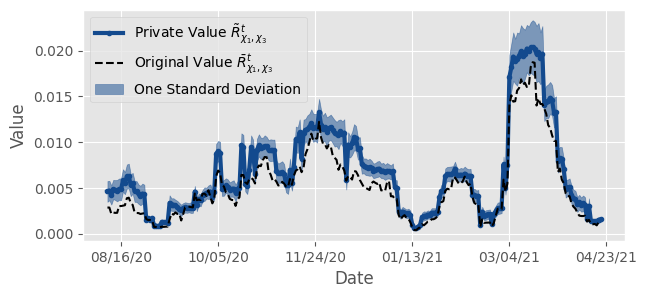

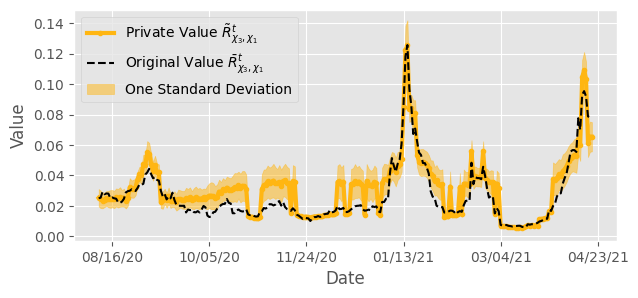

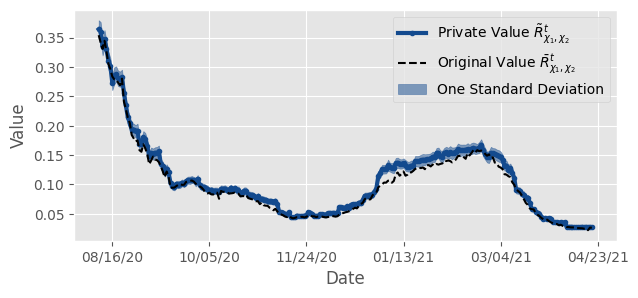

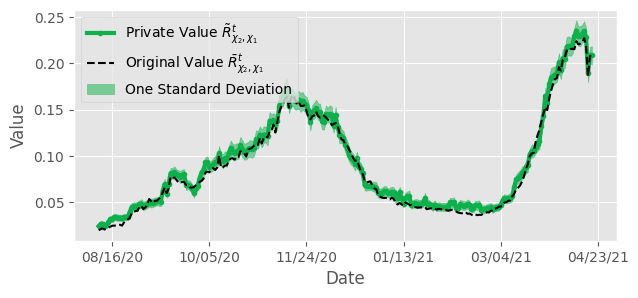

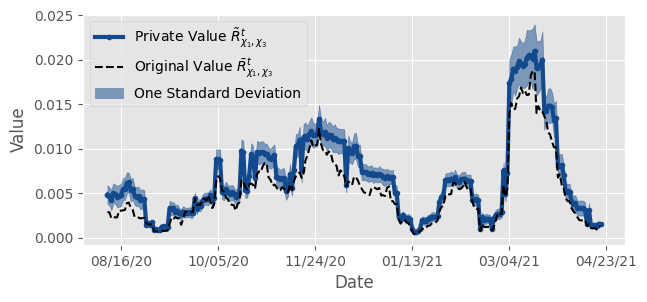

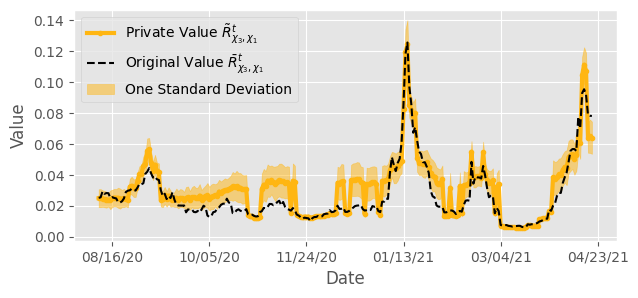

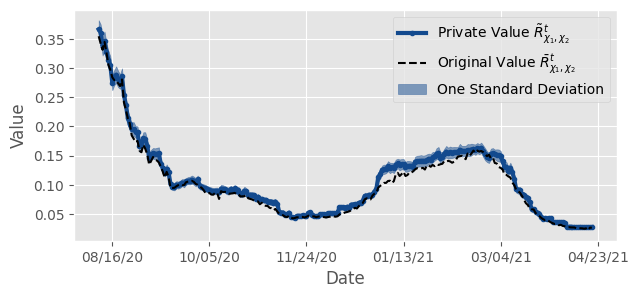

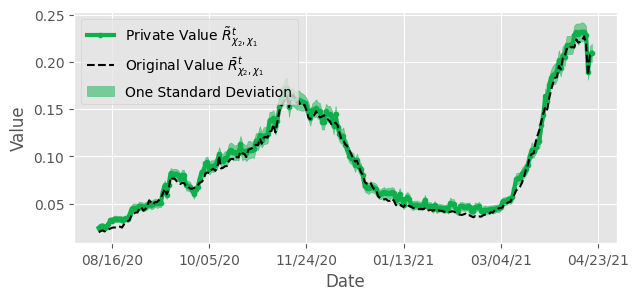

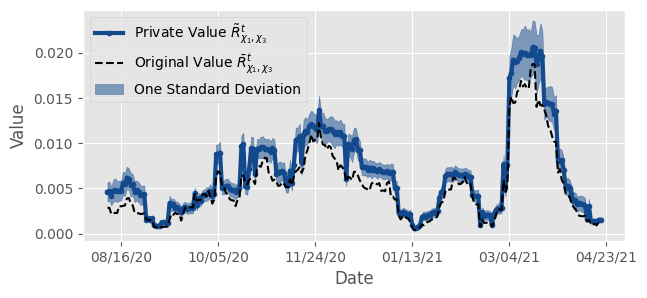

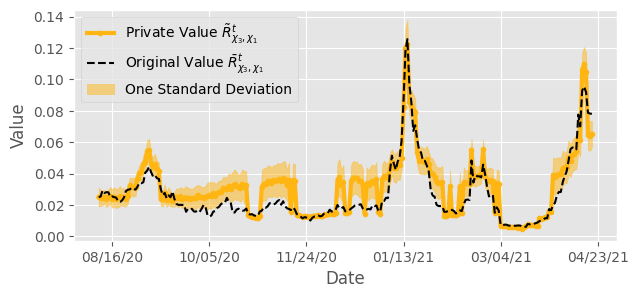

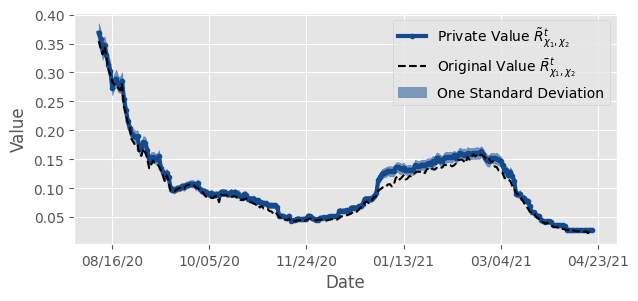

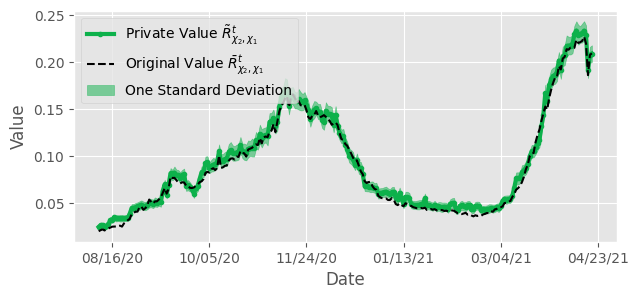

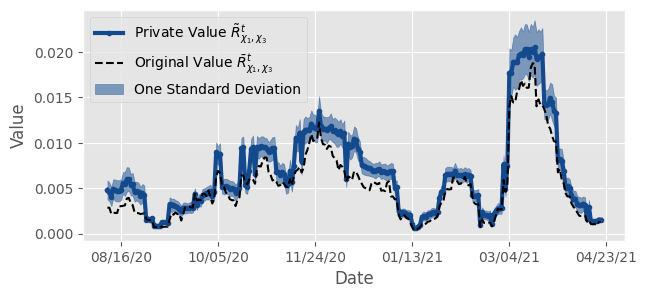

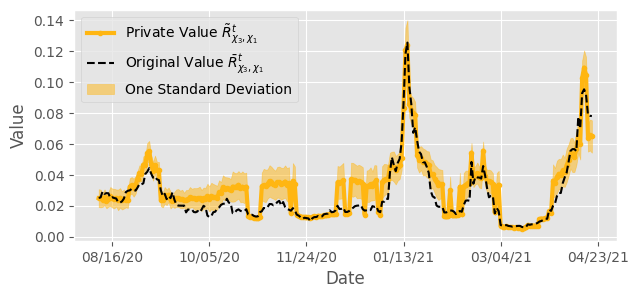

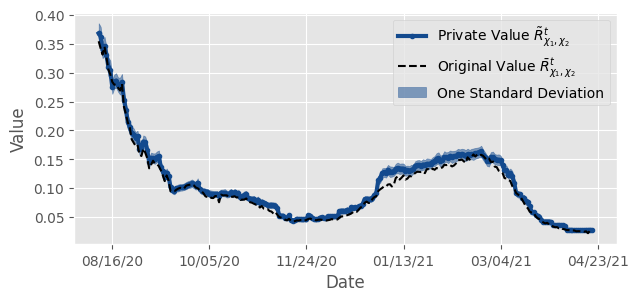

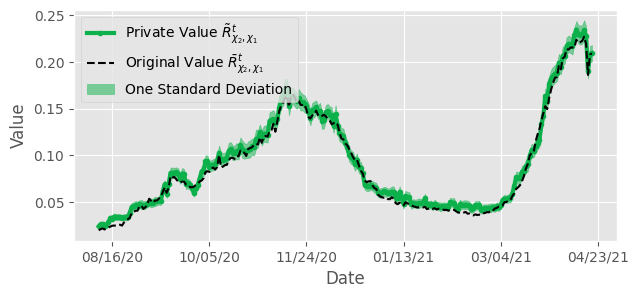

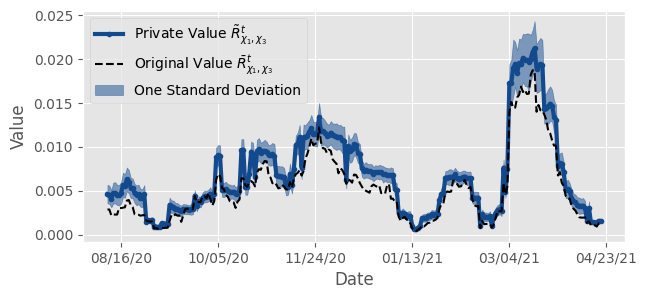

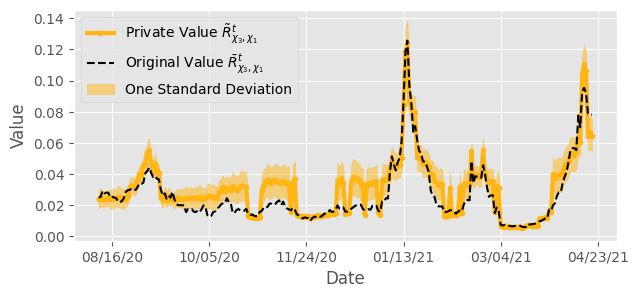

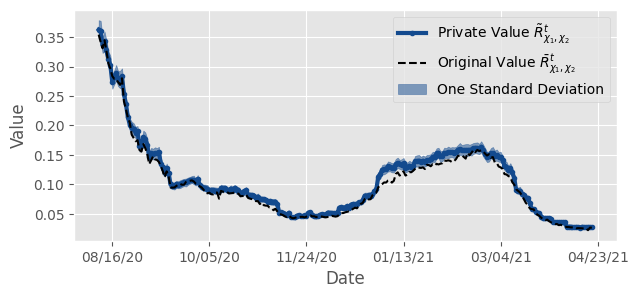

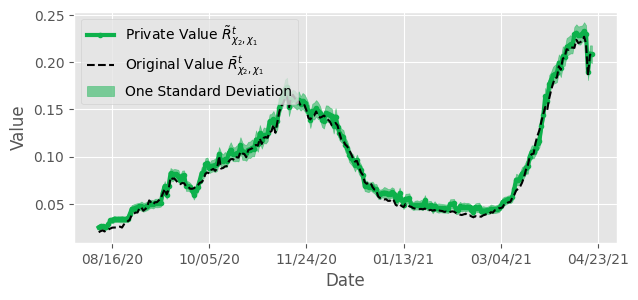

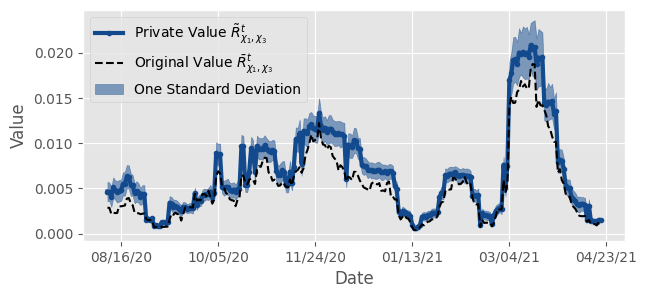

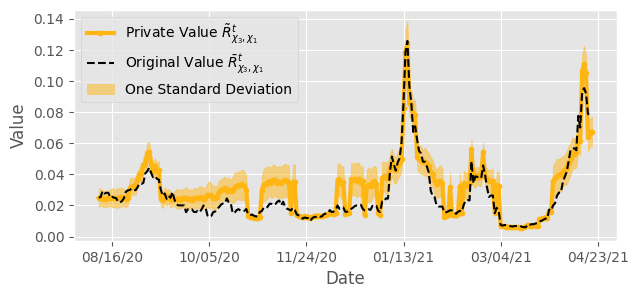

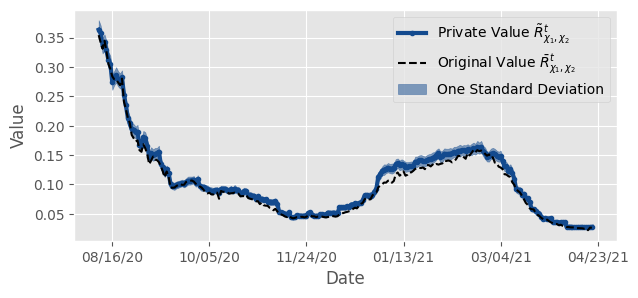

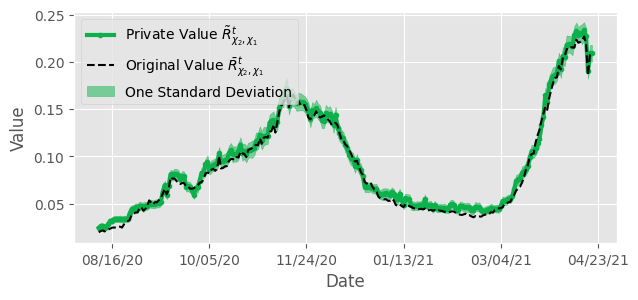

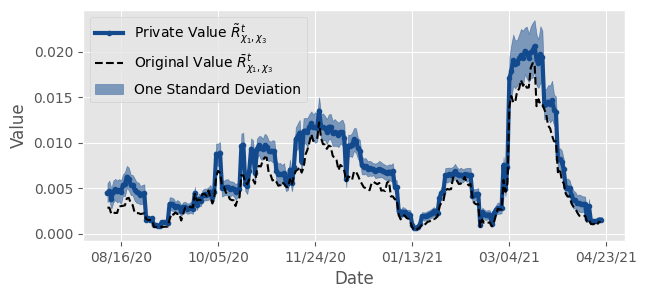

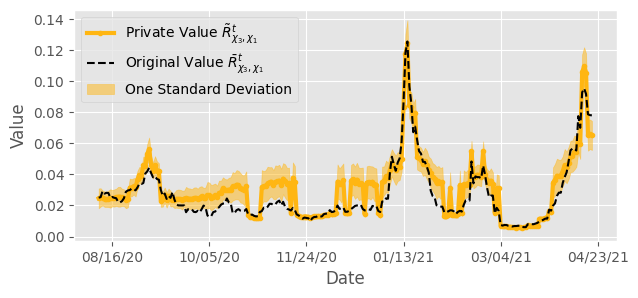

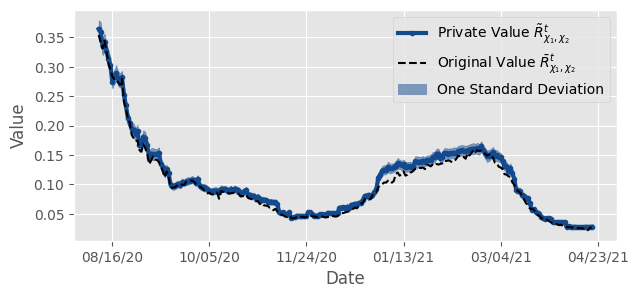

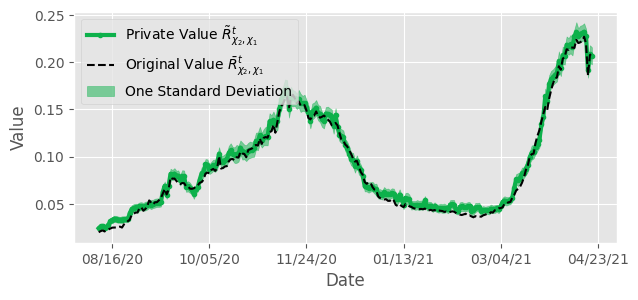

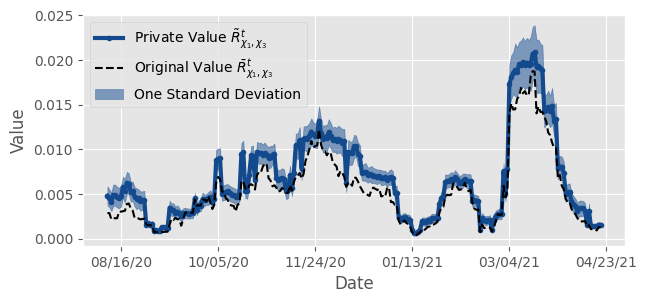

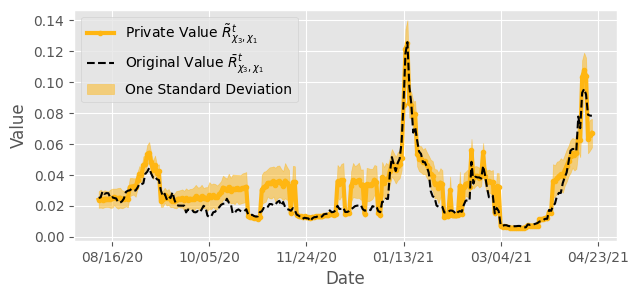

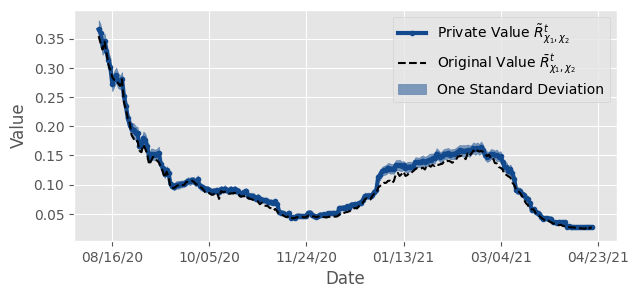

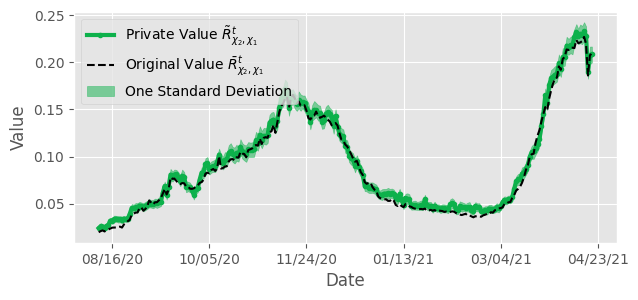

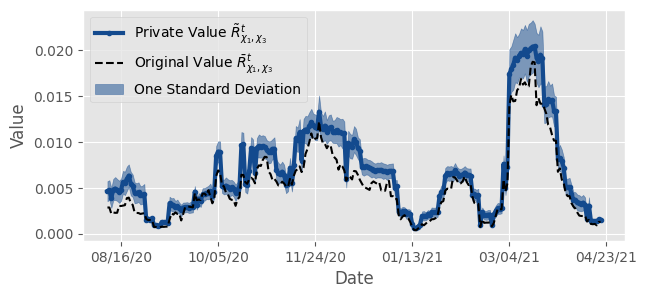

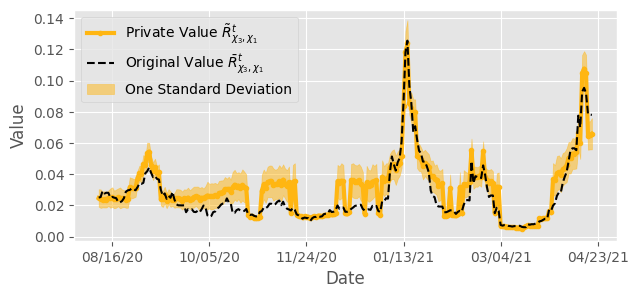

In [11]:
##########################
##### reproduction numbers
##########################
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = 'second_cluster_exp.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))   
with open(save_str, 'rb') as f:
    second_cluster_logger = pickle.load(f)

##########################################
##### effective reproduction number matrix
##########################################
eff_rep_num_list = second_cluster_logger["effective_reproduction_number_matrix"]

save_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'results', 'result_08_29')
)

#########################
##### Other plot settings
#########################
date = df_confirmed_case_second.columns.to_list()
days = [datetime.datetime.strptime(date[i], '%m/%d/%y') for i in range(len(date))]
node1 = 24
node2 = 39
node3 = 89

id_sim_1 = node2Info[node1]['id_sim']
id_sim_2 = node2Info[node2]['id_sim']
id_sim_3 = node2Info[node3]['id_sim']

color1 = node2Info[node1]['color']
color2 = node2Info[node2]['color']
color3 = node2Info[node3]['color']

for i in range(0,10):
    save_file_name = 'distributed_r0_exp_' + str(i) + '.pkl'
    save_str = os.path.abspath(os.path.join(save_dir, 
                                            save_file_name))   
    with open(save_str, 'rb') as f:
        exp_logger = pickle.load(f)
        start_index = exp_logger['sim_setting']['start_index']
        end_index = exp_logger['sim_setting']['end_index']
        end_index = 454
        linewidth = exp_logger['plot_setting']['linewidth']
        markersize = exp_logger['plot_setting']['markersize']
        fontsize = exp_logger['plot_setting']['fontsize']
        sample = exp_logger["private_sample_collection"]

    edge21_mean = get_rep_num_time_series(sample.get_mean(), id_sim_1, id_sim_2)            # type:ignore
    edge12_mean = get_rep_num_time_series(sample.get_mean(), id_sim_2, id_sim_1)            # type:ignore
    edge21_sigma = get_rep_num_time_series(sample.get_std(), id_sim_1, id_sim_2)            # type:ignore
    edge12_sigma = get_rep_num_time_series(sample.get_std(), id_sim_2, id_sim_1)            # type:ignore
    edge31_mean = get_rep_num_time_series(sample.get_mean(), id_sim_1, id_sim_3)            # type:ignore
    edge13_mean = get_rep_num_time_series(sample.get_mean(), id_sim_3, id_sim_1)            # type:ignore
    edge31_sigma = get_rep_num_time_series(sample.get_std(), id_sim_1, id_sim_3)            # type:ignore
    edge13_sigma = get_rep_num_time_series(sample.get_std(), id_sim_3, id_sim_1)            # type:ignore
    edge21_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node1, node2)
    edge12_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node2, node1)
    edge31_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node1, node3)
    edge13_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node3, node1)
    
    fig1 = plt.figure(figsize=(7,3))
    ax1 = fig1.add_subplot(111)
    ax1.plot(days[start_index:end_index+1], edge21_mean, marker='.', color = color1, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_1,\chi_2}^t$")
    ax1.plot(days[start_index:end_index+1], edge21_true, linestyle='dashed', color = 'black', label=r"Original Value $\bar{R}_{\chi_1,\chi_2}^t$")
    ax1.fill_between(days[start_index:end_index+1], 
                        [edge21_mean[i]+edge21_sigma[i] for i in range(len(edge21_mean))],     # type:ignore
                        [edge21_mean[i]-edge21_sigma[i] for i in range(len(edge21_mean))],     # type:ignore
                        alpha = 0.5, 
                        color = color1,
                    label='One Standard Deviation')
    ax1.set_xlabel('Date', fontsize=fontsize)
    ax1.set_ylabel('Value', fontsize=fontsize)
    ax1.legend()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=50))

    fig2 = plt.figure(figsize=(7,3))
    ax2 = fig2.add_subplot(111)
    ax2.plot(days[start_index:end_index+1], edge12_mean, marker='.', color = color2, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_2,\chi_1}^t$")
    ax2.plot(days[start_index:end_index+1], edge12_true, linestyle='dashed', color = 'black', label=r"Original Value $\bar{R}_{\chi_2,\chi_1}^t$")
    ax2.fill_between(days[start_index:end_index+1], 
                        [edge12_mean[i]+edge12_sigma[i] for i in range(len(edge12_mean))],     # type:ignore
                        [edge12_mean[i]-edge12_sigma[i] for i in range(len(edge12_mean))],     # type:ignore
                        alpha = 0.5, 
                        color = color2,
                    label='One Standard Deviation')
    ax2.set_xlabel('Date', fontsize=fontsize)
    ax2.set_ylabel('Value', fontsize=fontsize)
    ax2.legend()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=50))

    fig3 = plt.figure(figsize=(7,3))
    ax3 = fig3.add_subplot(111)
    ax3.plot(days[start_index:end_index+1], edge31_mean, marker='.', color = color1, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_1,\chi_3}^t$")
    ax3.plot(days[start_index:end_index+1], edge31_true, linestyle='dashed', color = 'black', label=r"Original Value $\bar{R}_{\chi_1,\chi_3}^t$")
    ax3.fill_between(days[start_index:end_index+1], 
                        [edge31_mean[i]+edge31_sigma[i] for i in range(len(edge31_mean))],     # type:ignore
                        [edge31_mean[i]-edge31_sigma[i] for i in range(len(edge31_mean))],     # type:ignore
                        alpha = 0.5, 
                        color = color1,
                    label='One Standard Deviation')
    ax3.set_xlabel('Date', fontsize=fontsize)
    ax3.set_ylabel('Value', fontsize=fontsize)
    ax3.legend()
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax3.xaxis.set_major_locator(mdates.DayLocator(interval=50))

    fig4 = plt.figure(figsize=(7,3))
    ax4 = fig4.add_subplot(111)
    ax4.plot(days[start_index:end_index+1], edge13_mean, marker='.', color = color3, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_3,\chi_1}^t$")
    ax4.plot(days[start_index:end_index+1], edge13_true, linestyle='dashed', color = 'black', label=r"Original Value $\bar{R}_{\chi_3,\chi_1}^t$")
    ax4.fill_between(days[start_index:end_index+1], 
                        [edge13_mean[i]+edge13_sigma[i] for i in range(len(edge13_mean))],     # type:ignore
                        [edge13_mean[i]-edge13_sigma[i] for i in range(len(edge13_mean))],     # type:ignore
                        alpha = 0.5, 
                        color = color3,
                     label='One Standard Deviation')
    ax4.set_xlabel('Date', fontsize=fontsize)
    ax4.set_ylabel('Value', fontsize=fontsize)
    ax4.legend()
    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax4.xaxis.set_major_locator(mdates.DayLocator(interval=50))

    #fig1, fig2 = plot_time_series_private_r0(sample, node1=node1, node2=node2, days=days[start_index:end_index+1], eff_rep_num_list=eff_rep_num_list[start_index:end_index+1])
    # Save this pic
    save_fig(fig = fig1,
             fname = f'Miami_to_Detroit_{i}',
             fig_dir = os.path.join(fig_dir, 'private_res'))
    save_fig(fig = fig2,
             fname = f'Detroit_to_Miami_{i}',
             fig_dir = os.path.join(fig_dir, 'private_res'))
    save_fig(fig = fig3,
             fname = f'Delta_to_Detroit_{i}',
             fig_dir = os.path.join(fig_dir, 'private_res'))
    save_fig(fig = fig4,
             fname = f'Detroit_to_Delta_{i}',
             fig_dir = os.path.join(fig_dir, 'private_res'))
    
    
    #fig3, fig4 = plot_time_series_private_r0(exp_logger["private_sample_collection"], node1=node1, node2=node3, days=days[start_index:end_index+1], eff_rep_num_list=eff_rep_num_list[start_index:end_index+1])

#### 2. Check the difference between true result and differential privacy result

In [7]:
# reproduction numbers
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = 'second_cluster_exp.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))   
with open(save_str, 'rb') as f:
    second_cluster_logger = pickle.load(f)

# effective reproduction number matrix
eff_rep_num_list = second_cluster_logger["effective_reproduction_number_matrix"]
plot_time_series_private_r0(eff_rep_num_list[start_index:end_index+1], node1=node1, node2=node2, days=days[start_index:end_index+1])
plot_time_series_private_r0(eff_rep_num_list[start_index:end_index+1], node1=node1, node2=node3, days=days[start_index:end_index+1])


TypeError: plot_time_series_private_r0() missing 1 required positional argument: 'eff_rep_num_list'

#### 3. private results subtract the original result

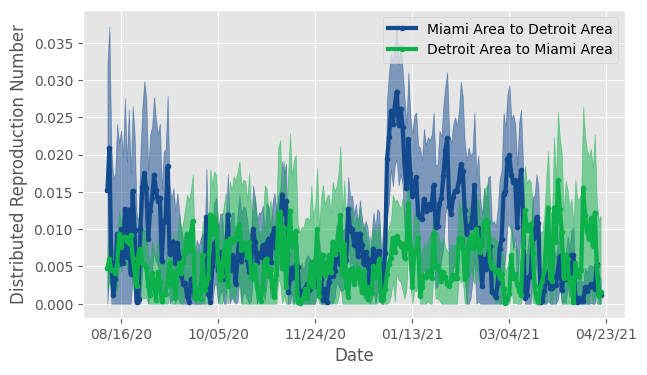

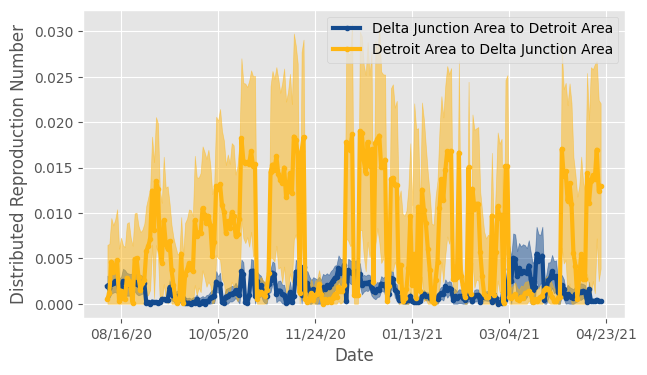

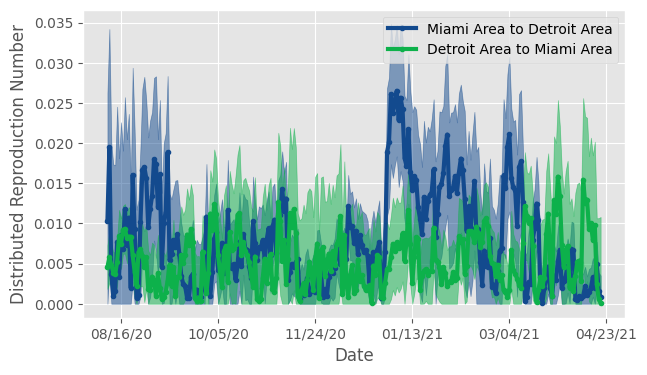

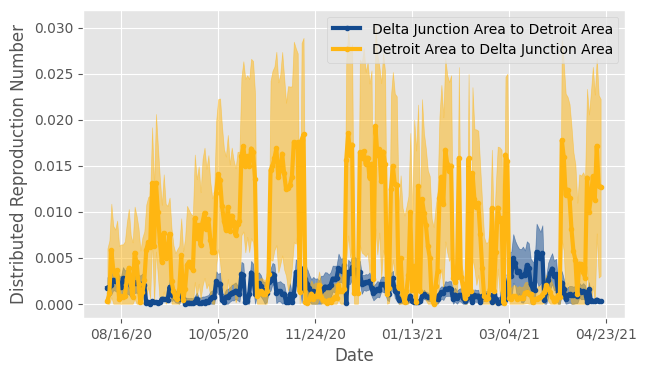

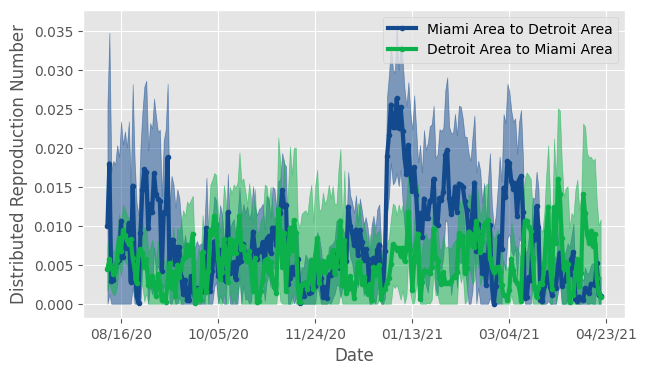

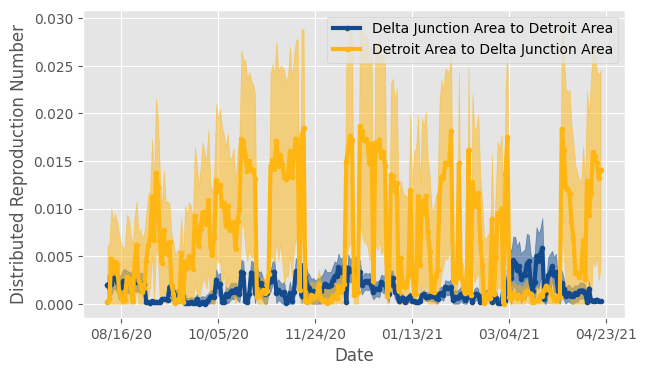

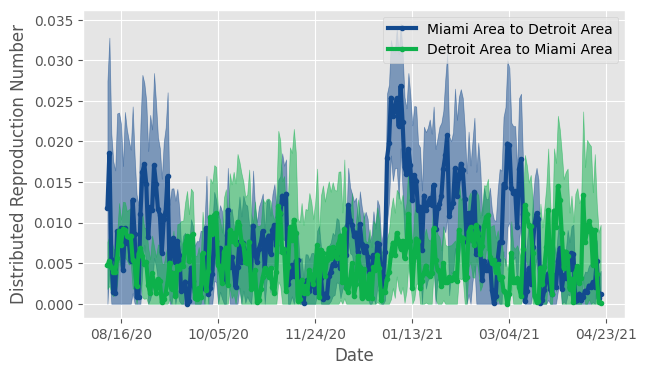

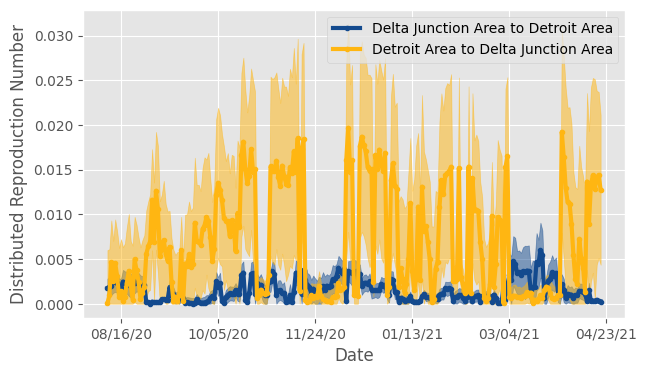

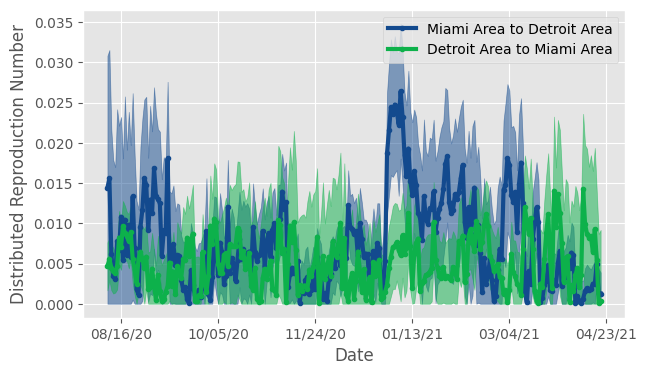

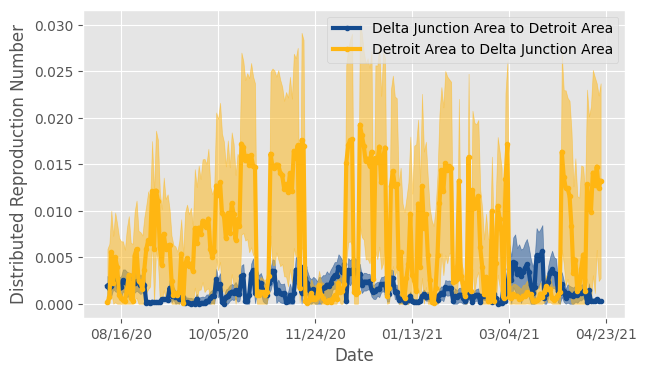

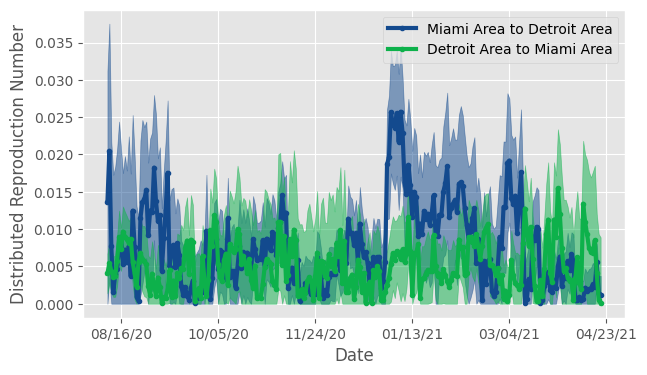

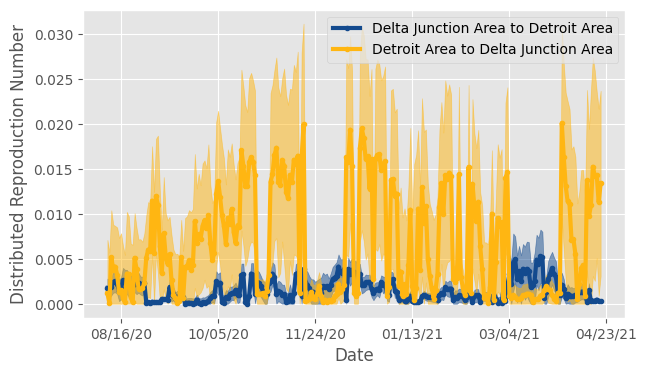

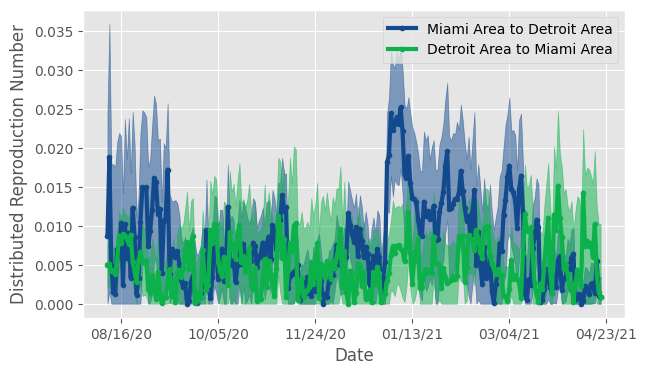

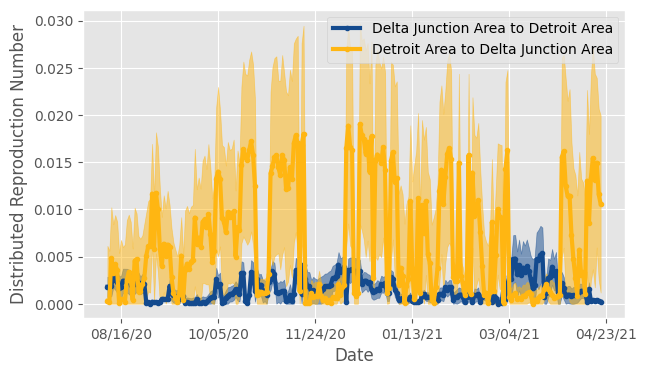

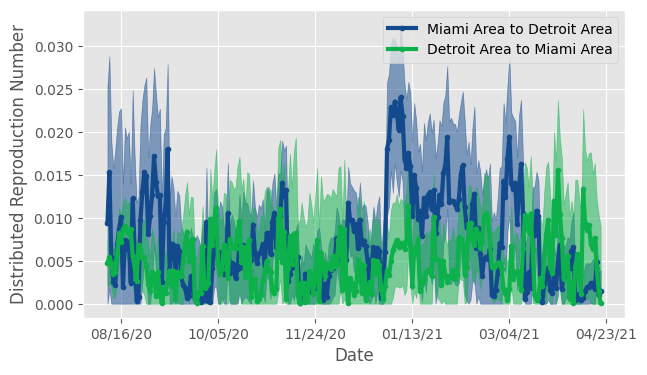

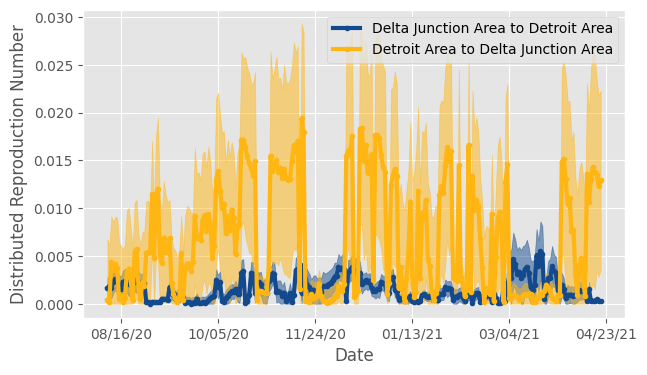

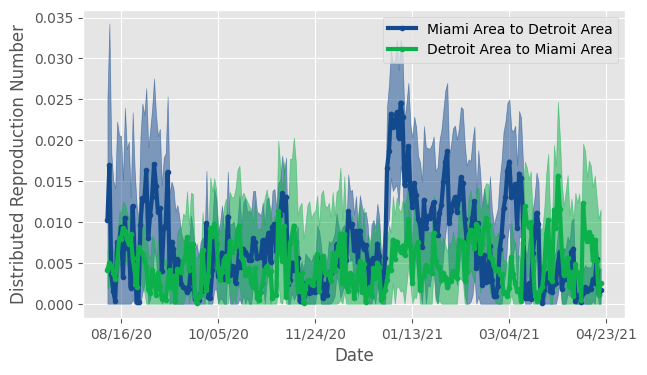

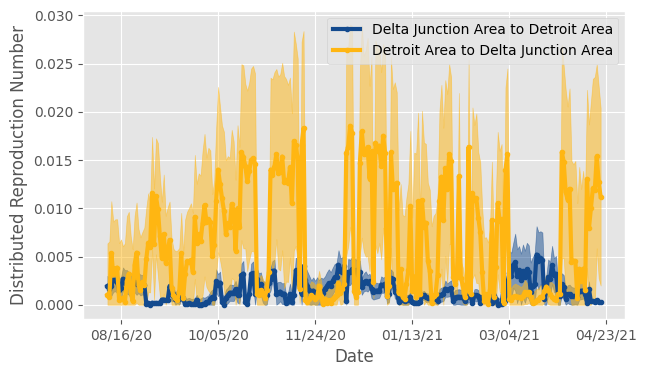

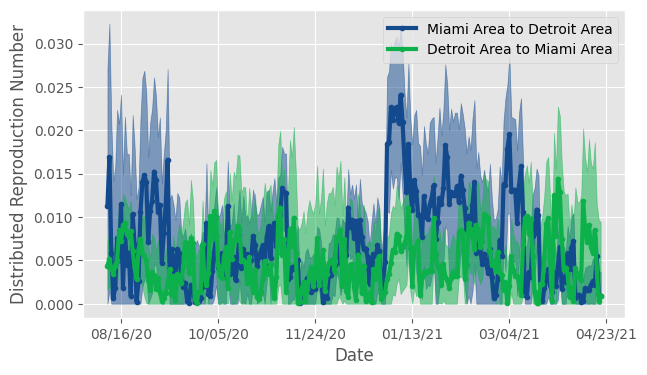

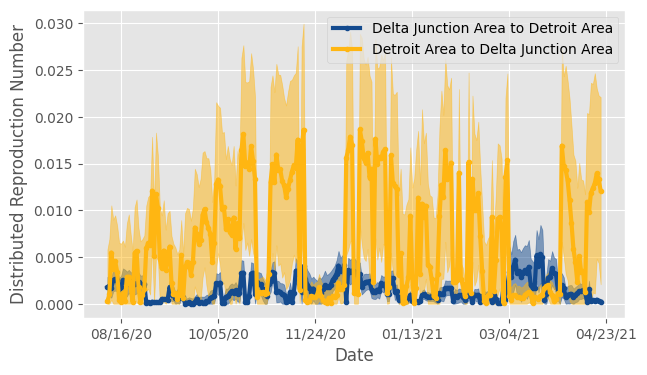

In [8]:
for i in range(0,10):
    save_file_name = 'distributed_r0_exp_' + str(i) + '.pkl'
    save_str = os.path.abspath(os.path.join(save_dir, 
                                            save_file_name))   
    with open(save_str, 'rb') as f:
        exp_logger = pickle.load(f)
        start_index = exp_logger['sim_setting']['start_index']
        end_index = exp_logger['sim_setting']['end_index']
        end_index = 454
        linewidth = exp_logger['plot_setting']['linewidth']
        markersize = exp_logger['plot_setting']['markersize']
        fontsize = exp_logger['plot_setting']['fontsize']

    plot_time_series_diff_private_original(exp_logger["private_sample_collection"],
                                eff_rep_num_list[start_index:end_index+1], 
                                node1=node1, 
                                node2=node2, 
                                days=days[start_index:end_index+1])
    
    plot_time_series_diff_private_original(exp_logger["private_sample_collection"],
                                eff_rep_num_list[start_index:end_index+1], 
                                node1=node1, 
                                node2=node3, 
                                days=days[start_index:end_index+1])

#### 4. mean squared error

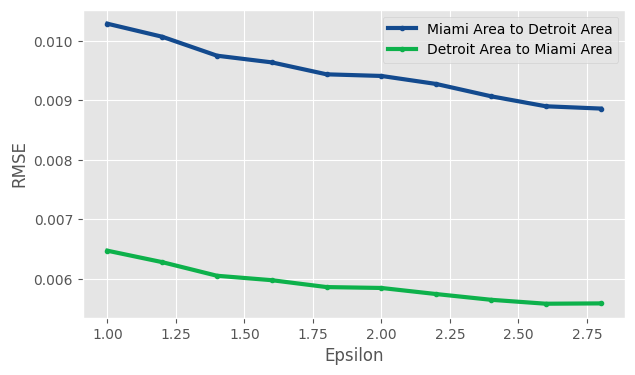

In [55]:
node2Info = {
    24: {
        'id_sim' : 0,
        'color' : '#134A8E',
        'label': 'Detroit Area'
    },

    39: {
        'id_sim' : 1,
        'color' : '#0DB14B',
        'label': 'Miami Area'
    },

    89: {
        'id_sim' : 2,
        'color' : '#FFB612',
        'label': 'Delta Junction Area'
    }
}
node1 = 24
node2 = 39
node3 = 89
linewidth = 3
markersize = 6
fontsize = 12
color1 = node2Info[node1]['color']
color2 = node2Info[node2]['color']
color3 = node2Info[node3]['color']
label_str1 = node2Info[node1]['label']
label_str2 = node2Info[node2]['label']
label_str3 = node2Info[node3]['label']
id_sim_1 = node2Info[node1]['id_sim']
id_sim_2 = node2Info[node2]['id_sim']
id_sim_3 = node2Info[node3]['id_sim']
edge12_rmse_list = []
edge21_rmse_list = []
edge13_rmse_list = []
edge31_rmse_list = []
edge12_err_mean_list = []
edge21_err_mean_list = []
edge13_err_mean_list = []
edge31_err_mean_list = []

for i in range(0,10):
    save_file_name = 'distributed_r0_exp_' + str(i) + '.pkl'
    save_str = os.path.abspath(os.path.join(save_dir, 
                                            save_file_name))   
    with open(save_str, 'rb') as f:
        exp_logger = pickle.load(f)
        start_index = exp_logger['sim_setting']['start_index']
        end_index = exp_logger['sim_setting']['end_index']
        end_index = 454

    #####################
    ##### private samples
    #####################
    # data settings
    edge21_mean = get_rep_num_time_series(exp_logger["private_sample_collection"].get_mean(), id_sim_1, id_sim_2)            # type:ignore
    edge12_mean = get_rep_num_time_series(exp_logger["private_sample_collection"].get_mean(), id_sim_2, id_sim_1)            # type:ignore
    edge31_mean = get_rep_num_time_series(exp_logger["private_sample_collection"].get_mean(), id_sim_1, id_sim_3)            # type:ignore
    edge13_mean = get_rep_num_time_series(exp_logger["private_sample_collection"].get_mean(), id_sim_3, id_sim_1)            # type:ignore

    #################
    ##### Original r0
    #################
    edge21 = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node1, node2)            # type:ignore
    edge12 = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node2, node1)            # type:ignore
    edge31 = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node1, node3)            # type:ignore
    edge13 = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node3, node1)            # type:ignore

    edge12_rmse = np.sqrt(np.mean([(edge12[i] - edge12_mean[i])**2 for i in range(len(edge12))]))
    edge21_rmse = np.sqrt(np.mean([(edge21[i] - edge21_mean[i])**2 for i in range(len(edge21))]))
    edge13_rmse = np.sqrt(np.mean([(edge13[i] - edge13_mean[i])**2 for i in range(len(edge13))]))
    edge31_rmse = np.sqrt(np.mean([(edge31[i] - edge31_mean[i])**2 for i in range(len(edge31))]))
    edge21_error = [abs(edge21_mean[i] - edge21[i])/edge21[i]*100 for i in range(len(edge21))]
    edge12_error = [abs(edge12_mean[i] - edge12[i])/edge12[i]*100 for i in range(len(edge12))]
    edge31_error = [abs(edge31_mean[i] - edge31[i])/edge31[i]*100 for i in range(len(edge31))]
    edge13_error = [abs(edge13_mean[i] - edge13[i])/edge13[i]*100 for i in range(len(edge13))]
    edge12_err_mean_list.append(np.mean(edge12_error))
    edge21_err_mean_list.append(np.mean(edge21_error))
    edge13_err_mean_list.append(np.mean(edge13_error))
    edge31_err_mean_list.append(np.mean(edge31_error))
    edge12_rmse_list.append(edge12_rmse)
    edge21_rmse_list.append(edge21_rmse)
    edge13_rmse_list.append(edge13_rmse)
    edge31_rmse_list.append(edge31_rmse)


fig1 = plt.figure(figsize=(7,4))
ax1 = fig1.add_subplot(111)
ax1.plot(np.arange(1,3,0.2), edge21_rmse_list, marker='.', color = color1, linewidth=linewidth, markersize=markersize, label=label_str2 + " to " + label_str1)
ax1.plot(np.arange(1,3,0.2), edge12_rmse_list, marker='.', color = color2, linewidth=linewidth, markersize=markersize, label=label_str1 + " to " + label_str2)
ax1.set_xlabel('Epsilon', fontsize=fontsize)
ax1.set_ylabel('RMSE', fontsize=fontsize)
ax1.legend()

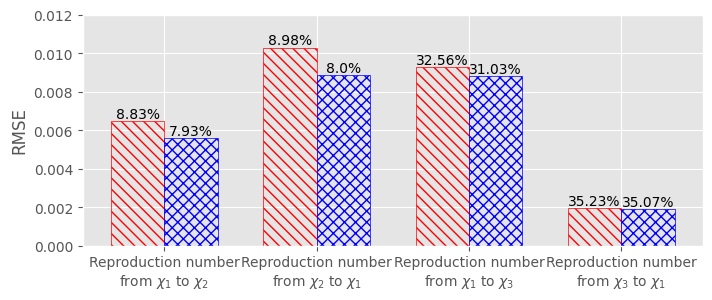

Written file: /home/python/shared/figures/RMSE.png
Written file: /home/python/shared/figures/RMSE.svg


In [69]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# set width of bar 
barWidth = 0.35
fig = plt.figure(figsize =(8, 3)) 
ax = fig.add_subplot(111)

# set height of bar 
epsilon1 = [edge12_rmse_list[0], edge21_rmse_list[0], edge13_rmse_list[0], edge31_rmse_list[0]]
epsilon3 = [edge12_rmse_list[-1], edge21_rmse_list[-1], edge13_rmse_list[-1], edge31_rmse_list[-1]]

# Set position of bar on X axis 
br1 = np.arange(len(epsilon1)) 
br2 = [x + barWidth for x in br1]  

# Make the plot
ax.bar(br1, epsilon1, fill=False, width = barWidth, color = 'white', 
        edgecolor ='red', label =r'$\epsilon=1$', hatch='\\\\\\') 
ax.bar(br2, epsilon3, fill=False, width = barWidth, 
        edgecolor ='blue', label =r'$\epsilon=3$', hatch='xxx') 

# Adding Xticks 
#plt.xlabel('Branch', fontsize=fontsize) 
ax.set_ylabel('RMSE', fontsize=fontsize) 
ax.set_xticks([r + barWidth/2 for r in range(len(epsilon1))], 
        [r'Reproduction number''\n' r'from $\chi_1$ to $\chi_2$', 
         r'Reproduction number''\n' r'from $\chi_2$ to $\chi_1$', 
         r'Reproduction number''\n' r'from $\chi_1$ to $\chi_3$', 
         r'Reproduction number''\n' r'from $\chi_3$ to $\chi_1$'])
ax.set_ylim([0,0.012])

rects = ax.patches

# Make some labels.
labels = [str(round(edge12_err_mean_list[0],2)) + "%",
         str(round(edge21_err_mean_list[0],2)) + "%",
         str(round(edge13_err_mean_list[0],2)) + "%",
         str(round(edge31_err_mean_list[0],2)) + "%",
         str(round(edge12_err_mean_list[-1],2)) + "%",
         str(round(edge21_err_mean_list[-1],2)) + "%",
         str(round(edge13_err_mean_list[-1],2)) + "%",
         str(round(edge31_err_mean_list[-1],2)) + "%"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

plt.show()

ax.legend() 
save_fig(fig = fig,
             fname = 'RMSE',
             fig_dir = fig_dir)

Average percentage of error from area 2 to area 1: 8.983380709204555
Average percentage of error from area 1 to area 2: 8.826153329102484
Average percentage of error from area 3 to area 1: 35.233071353197225
Average percentage of error from area 1 to area 3: 32.557441395595276


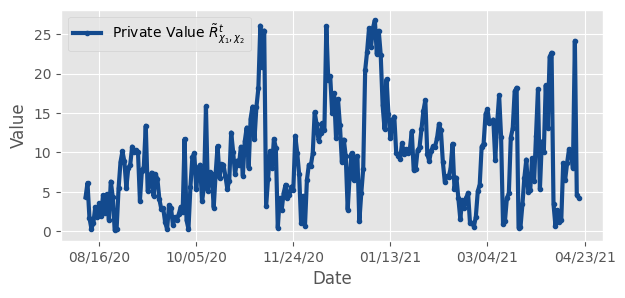

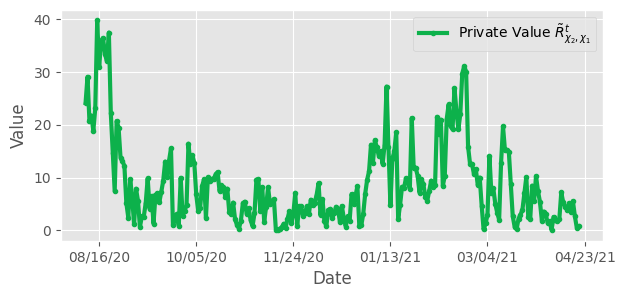

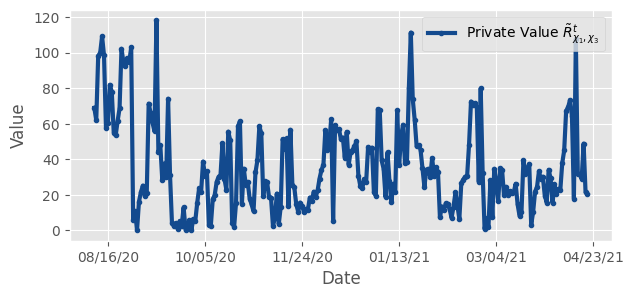

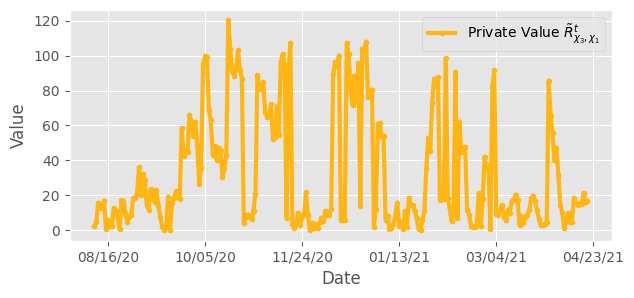

In [54]:
##########################
##### reproduction numbers
##########################
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = 'second_cluster_exp.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))   
with open(save_str, 'rb') as f:
    second_cluster_logger = pickle.load(f)

##########################################
##### effective reproduction number matrix
##########################################
eff_rep_num_list = second_cluster_logger["effective_reproduction_number_matrix"]

save_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'results', 'result_08_29')
)

#########################
##### Other plot settings
#########################
date = df_confirmed_case_second.columns.to_list()
days = [datetime.datetime.strptime(date[i], '%m/%d/%y') for i in range(len(date))]
node1 = 24
node2 = 39
node3 = 89

id_sim_1 = node2Info[node1]['id_sim']
id_sim_2 = node2Info[node2]['id_sim']
id_sim_3 = node2Info[node3]['id_sim']

color1 = node2Info[node1]['color']
color2 = node2Info[node2]['color']
color3 = node2Info[node3]['color']

save_file_name = 'distributed_r0_exp_0.pkl'
save_str = os.path.abspath(os.path.join(save_dir, 
                                        save_file_name))   
with open(save_str, 'rb') as f:
    exp_logger = pickle.load(f)
    start_index = exp_logger['sim_setting']['start_index']
    end_index = exp_logger['sim_setting']['end_index']
    end_index = 454
    linewidth = exp_logger['plot_setting']['linewidth']
    markersize = exp_logger['plot_setting']['markersize']
    fontsize = exp_logger['plot_setting']['fontsize']
    sample = exp_logger["private_sample_collection"]

edge21_mean = get_rep_num_time_series(sample.get_mean(), id_sim_1, id_sim_2)            # type:ignore
edge12_mean = get_rep_num_time_series(sample.get_mean(), id_sim_2, id_sim_1)            # type:ignore
edge21_sigma = get_rep_num_time_series(sample.get_std(), id_sim_1, id_sim_2)            # type:ignore
edge12_sigma = get_rep_num_time_series(sample.get_std(), id_sim_2, id_sim_1)            # type:ignore
edge31_mean = get_rep_num_time_series(sample.get_mean(), id_sim_1, id_sim_3)            # type:ignore
edge13_mean = get_rep_num_time_series(sample.get_mean(), id_sim_3, id_sim_1)            # type:ignore
edge31_sigma = get_rep_num_time_series(sample.get_std(), id_sim_1, id_sim_3)            # type:ignore
edge13_sigma = get_rep_num_time_series(sample.get_std(), id_sim_3, id_sim_1)            # type:ignore
edge21_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node1, node2)
edge12_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node2, node1)
edge31_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node1, node3)
edge13_true = get_rep_num_time_series(eff_rep_num_list[start_index:end_index+1], node3, node1)
edge21_error = [abs(edge21_mean[i] - edge21_true[i])/edge21_true[i]*100 for i in range(len(edge21_true))]
edge12_error = [abs(edge12_mean[i] - edge12_true[i])/edge12_true[i]*100 for i in range(len(edge12_true))]
edge31_error = [abs(edge31_mean[i] - edge31_true[i])/edge31_true[i]*100 for i in range(len(edge31_true))]
edge13_error = [abs(edge13_mean[i] - edge13_true[i])/edge13_true[i]*100 for i in range(len(edge13_true))]

fig1 = plt.figure(figsize=(7,3))
ax1 = fig1.add_subplot(111)
ax1.plot(days[start_index:end_index+1], edge21_error, marker='.', color = color1, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_1,\chi_2}^t$")
ax1.set_xlabel('Date', fontsize=fontsize)
ax1.set_ylabel('Value', fontsize=fontsize)
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig2 = plt.figure(figsize=(7,3))
ax2 = fig2.add_subplot(111)
ax2.plot(days[start_index:end_index+1], edge12_error, marker='.', color = color2, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_2,\chi_1}^t$")
ax2.set_xlabel('Date', fontsize=fontsize)
ax2.set_ylabel('Value', fontsize=fontsize)
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig3 = plt.figure(figsize=(7,3))
ax3 = fig3.add_subplot(111)
ax3.plot(days[start_index:end_index+1], edge31_error, marker='.', color = color1, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_1,\chi_3}^t$")
ax3.set_xlabel('Date', fontsize=fontsize)
ax3.set_ylabel('Value', fontsize=fontsize)
ax3.legend()
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig4 = plt.figure(figsize=(7,3))
ax4 = fig4.add_subplot(111)
ax4.plot(days[start_index:end_index+1], edge13_error, marker='.', color = color3, linewidth=linewidth, markersize=markersize, label=r"Private Value $\tilde{R}_{\chi_3,\chi_1}^t$")
ax4.set_xlabel('Date', fontsize=fontsize)
ax4.set_ylabel('Value', fontsize=fontsize)
ax4.legend()
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=50))

print(f"Average percentage of error from area 2 to area 1: {np.mean(edge21_error)}")
print(f"Average percentage of error from area 1 to area 2: {np.mean(edge12_error)}")
print(f"Average percentage of error from area 3 to area 1: {np.mean(edge31_error)}")
print(f"Average percentage of error from area 1 to area 3: {np.mean(edge13_error)}")